In [ ]:
from functools import partial

# Humne yeh change kiya
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"


from transformers import CLIPVisionModel 
import torch
from torch import nn
from torchvision import transforms
from PIL import Image
import os
import torch
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

# proxy = 'http://127.0.0.1:7890'
# os.environ['http_proxy'] = proxy
# os.environ['https_proxy'] = proxy
# import subprocess
# import os

# result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
# output = result.stdout
# for line in output.splitlines():
#     if '=' in line:
#         var, value = line.split('=', 1)
#         os.environ[var] = value
import torch
import torch.nn as nn
from transformers import CLIPVisionModel
from torchvision import transforms
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
import transformers
print(transformers.__version__)

4.28.0


In [3]:
from transformers import CLIPVisionModelWithProjection, CLIPImageProcessor

In [4]:
class CLIPEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        # self.clip = CLIPVisionModel.from_pretrained('openai/clip-vit-large-patch14').to(torch.bfloat16)
        # self.clip_size = (224, 224)

        self.preprocess = CLIPImageProcessor(
            size={"shortest_edge":512},
            # size={"height": 512, "width": 512},  #humne comment kiya hai isse
            
            crop_size={"height": 512, "width": 512},
        )


        # for param in self.clip.parameters():
        #     param.requires_grad = False
        self.image_encoder = CLIPVisionModelWithProjection.from_pretrained(
        "h94/IP-Adapter", 
        # "laion2b_s32b_b79k",
        subfolder="models/image_encoder",
        torch_dtype=torch.float16,
        ).to("cuda")
        
        
    
def encode_image(image, image_encoder, feature_extractor, num_images_per_prompt=1, device='cuda'):
    dtype = next(image_encoder.parameters()).dtype

    if not isinstance(image, torch.Tensor):
        image = feature_extractor(image, return_tensors="pt").pixel_values # [1, 3, 224, 224]
        print("image", image.shape)
    image = image.to(device=device, dtype=dtype)
    image_embeds = image_encoder(image).image_embeds # (1, 1024)
    image_embeds = image_embeds.repeat_interleave(num_images_per_prompt, dim=0) # (num_images_per_prompt, 1024)

    return image_embeds

In [5]:
# example_image_path = "/root/autodl-tmp/Workspace/EEG_caption/docs/test/alpaca_03s.jpg"
clip_encoder = CLIPEncoder().to(device)

# from diffusers.utils import load_image
# image_prompt = load_image(example_image_path)
# display(image_prompt)


/DATA/deep_learning/dependencies/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [6]:
# image = Image.open(example_image_path).convert("RGB")
# image_embeds = encode_image(image_prompt, clip_encoder.image_encoder, clip_encoder.preprocess, 1, device)
# image_embeds.shape

In [ ]:
import torch
# torch.save(image_embeds, 'image_embeds.pt')
image_embeds_1 = torch.load('data/ViT-H-14_features_test.pt', map_location=device)['img_features'].unsqueeze(1)

In [8]:
image_embeds_1.shape

torch.Size([200, 1, 1024])

In [ ]:
eeg_embeds_1 = torch.load('data/weights/EEG_Image_decode/emb_eeg/ATM_S_eeg_features_sub-08_test.pt', map_location=device).unsqueeze(1)


In [10]:
eeg_embeds_1.shape

torch.Size([200, 1, 1024])

In [35]:
# Humne added this cell
eeg_embeds_1[0]

tensor([[-0.1914, -0.1679,  0.5392,  ..., -0.3024,  0.0500,  0.0823]],
       device='cuda:0')

In [11]:
# img_feature = img_feature.mean(dim=1).squeeze(0)
# img_feature = img_feature.unsqueeze(0)
# img_feature.shape

In [12]:
# open_clip_img_feature = torch.load('ViT-H-14_features_test.pt', map_location=device)['img_features'].unsqueeze(1)
# open_clip_img_feature[0].shape

In [13]:
# open_clip_img_feature[0].std()

In [14]:
# import torch
# image_features_test = torch.load("/home/ldy/Workspace/EEG_caption/ViT-H-14_features_test.pt")
# image_features_test['img_features'].shape

In [15]:
# image_features_test['img_features'][0].unsqueeze(0).shape

In [16]:
# import torch
# image_features_test = torch.load("/home/ldy/Workspace/BrainAligning/ViT-L-14_features_multimodal_test.pt")
# image_features_test['img_features'].shape

In [17]:

import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# import open_clip
from matplotlib.font_manager import FontProperties


from diffusion_prior import *
from custom_pipeline_low_level import *
# from custom_pipeline import *
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/DATA/deep_learning/dependencies/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [18]:
image_embeds_1.shape

torch.Size([200, 1, 1024])

In [19]:
image_embeds_1[0].shape

torch.Size([1, 1024])

In [ ]:
from PIL import Image
index = 65
# /DATA/deep_learning/04-19_19-42_vae_imgs/epoch_40/reconstructed_image_171_0.png
low_level_img_path = f'output/images/04-20_03-30_vae_train_imgs/epoch_90/reconstructed_image_123.png'
# Provides low-level images 
low_level_image = Image.open(low_level_img_path)
low_level_image.show()
low_level_image = clip_encoder.preprocess(low_level_image, return_tensors="pt").pixel_values # [1, 3, 224, 224]
low_level_image.shape

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/dl/snap/code/common/.cache/gio-modules/libgiolibproxy.so


torch.Size([1, 3, 512, 512])

In [21]:
from diffusers.image_processor import VaeImageProcessor
image_processor = VaeImageProcessor()
from diffusers import AutoencoderKL
# path = "stabilityai/sdxl-turbo"
# vlmodel = AutoencoderKL.from_pretrained(
#     path, subfolder='vae').to(device)

pipe = DiffusionPipeline.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float, variant="fp16")
vlmodel = pipe.vae

posterior = vlmodel.encode(low_level_image).latent_dist
image_latent = posterior.mode()
print("image_latent.shape", image_latent.shape)

eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE
/DATA/deep_learning/dependencies/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/DATA/deep_learning/dependencies/lib/python3.10/site-packages/diffusers/utils/outputs.py:63: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


image_latent.shape torch.Size([1, 4, 64, 64])


In [22]:
# with torch.no_grad():
#     x_rec = vlmodel.decode(image_latent).sample
#     image_rec = image_processor.postprocess(x_rec, output_type='pil')
#     image_rec[0].show()

9675648


10it [00:00, 82.30it/s]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

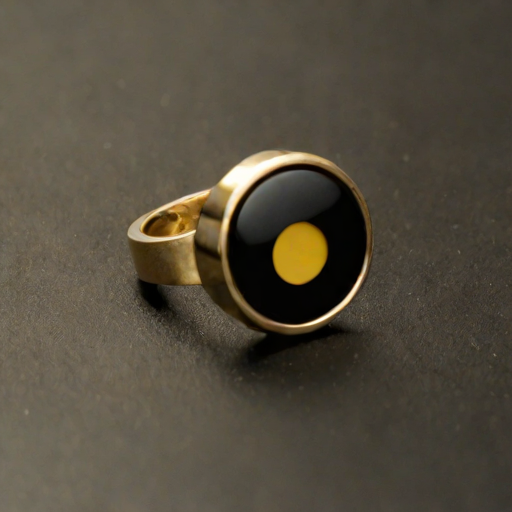

  0%|          | 0/4 [00:00<?, ?it/s]

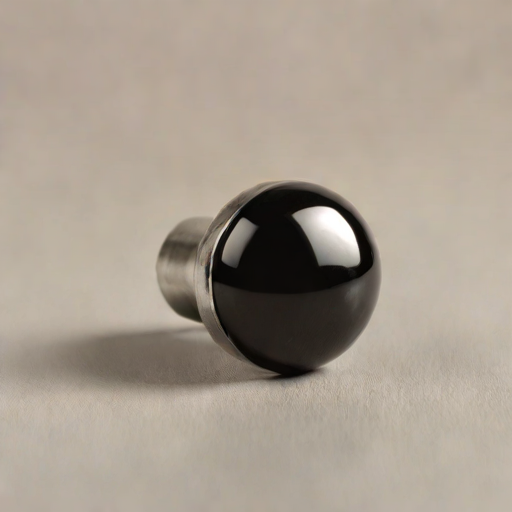

In [ ]:
from IPython.display import Image, displeeg_embeds_1[index],
print(sum(p.numel() for p in diffusion_prior.parameters() if p.requires_grad))
pipe = Pipe(diffusion_prior, device=device)

# load pretrained model
pipe.diffusion_prior.load_state_dict(torch.load(f'data/weights/EEG_Image_decode/fintune_ckpts/sub-08/diffusion_prior.pt', map_location=device))
h = pipe.generate(c_embeds=eeg_embeds_1[index], num_inference_steps=10, guidance_scale=2.0)


generator = Generator4Embeds(num_inference_steps=4, device=device)
# set a seed value
seed_value = 42
gen = torch.Generator(device=device)
gen.manual_seed(seed_value)

image_1 = generator.generate(eeg_embeds_1[index], generator=gen)  
display(image_1)

image_2 = generator.generate(h, generator=gen)  
display(image_2)


/DATA/deep_learning/dependencies/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/5 [00:00<?, ?it/s]

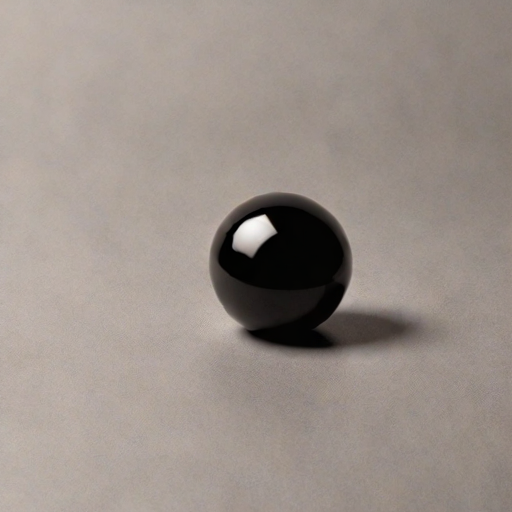

In [36]:
from IPython.display import Image, display

# Humne changes inference frmo 10 to 5
generator = Generator4Embeds(num_inference_steps=5, device=device, img2img_strength=0.8, low_level_image=low_level_image, low_level_latent=None)
# set a seed value
# seed_value = 30
gen = torch.Generator(device=device)
gen.manual_seed(seed_value)
image = generator.generate(h, generator=gen)
display(image)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/5 [00:00<?, ?it/s]

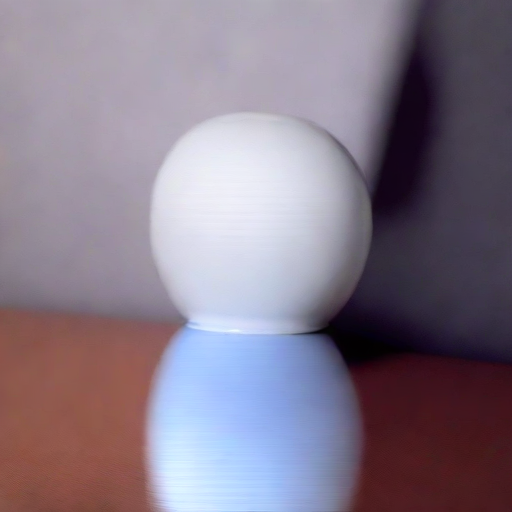

In [25]:
from IPython.display import Image, display

generator = Generator4Embeds(num_inference_steps=5, device=device, img2img_strength=0.5, low_level_image=low_level_image, low_level_latent=None)
# set a seed value
# seed_value = 30
gen = torch.Generator(device=device)
gen.manual_seed(seed_value)
image = generator.generate(h,
                           text_prompt = "a white ceramic finish ceramic finish with a white ceramic finish.",               
                           generator=gen)
display(image)

In [26]:
# seed_value = 42
# gen = torch.Generator(device=device)
# gen.manual_seed(seed_value)
# image = generator.generate(img_feature, generator=gen)
# display(image)

['reconstructed_image_0_0.png', 'reconstructed_image_2_0.png', 'reconstructed_image_3_0.png', 'reconstructed_image_4_0.png', 'reconstructed_image_5_0.png', 'reconstructed_image_6_0.png', 'reconstructed_image_7_0.png', 'reconstructed_image_8_0.png', 'reconstructed_image_10_0.png', 'reconstructed_image_11_0.png', 'reconstructed_image_12_0.png', 'reconstructed_image_14_0.png', 'reconstructed_image_15_0.png', 'reconstructed_image_16_0.png', 'reconstructed_image_19_0.png', 'reconstructed_image_20_0.png', 'reconstructed_image_21_0.png', 'reconstructed_image_22_0.png', 'reconstructed_image_23_0.png', 'reconstructed_image_24_0.png', 'reconstructed_image_25_0.png', 'reconstructed_image_26_0.png', 'reconstructed_image_27_0.png', 'reconstructed_image_29_0.png', 'reconstructed_image_30_0.png', 'reconstructed_image_31_0.png', 'reconstructed_image_32_0.png', 'reconstructed_image_33_0.png', 'reconstructed_image_34_0.png', 'reconstructed_image_35_0.png', 'reconstructed_image_37_0.png', 'reconstructed_

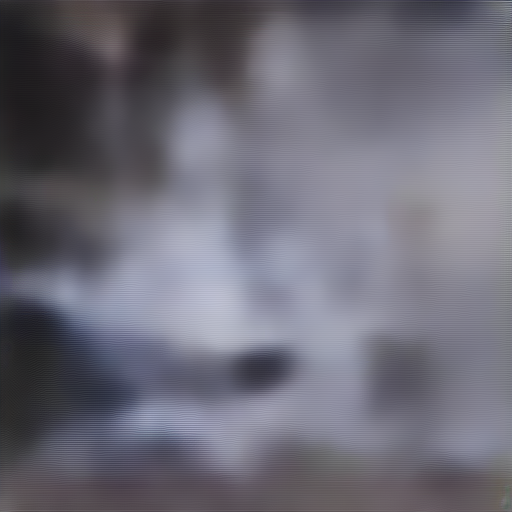

/DATA/deep_learning/dependencies/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/5 [00:00<?, ?it/s]

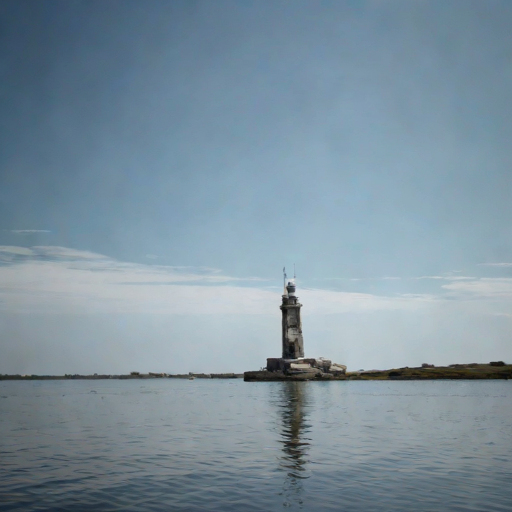

60 80
reconstructed_image_80_0.png


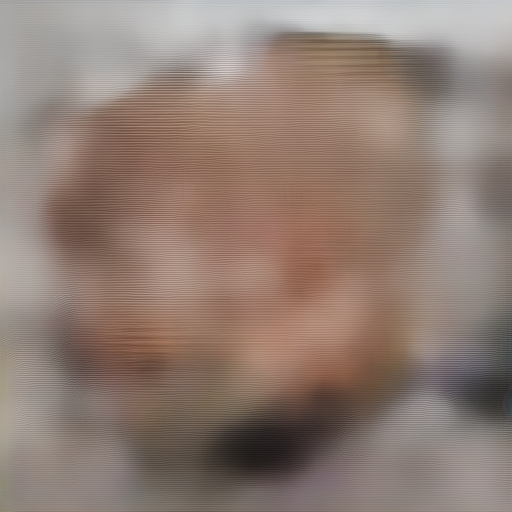

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/5 [00:00<?, ?it/s]

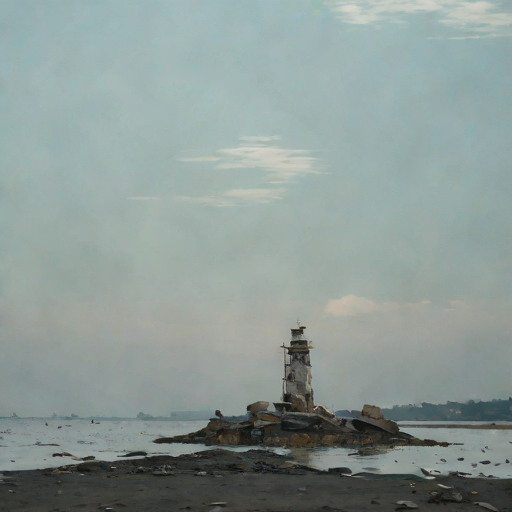

118 160
reconstructed_image_160_0.png


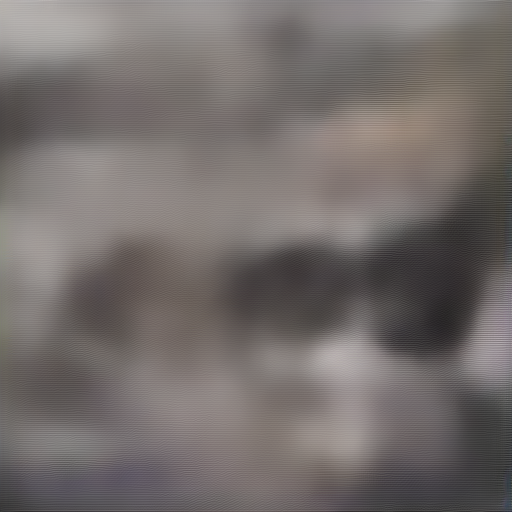

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

latents torch.Size([1, 4, 64, 64])
noise torch.Size([1, 4, 64, 64])


  0%|          | 0/5 [00:00<?, ?it/s]

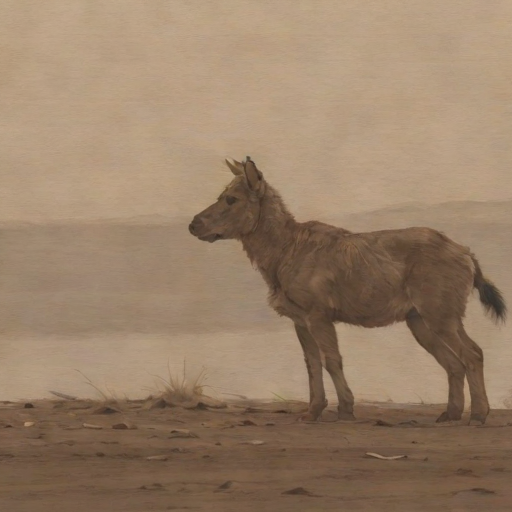

All images have been successfully reconstructed and saved to: /DATA/deep_learning/sdxl-output/


In [ ]:
import os
from PIL import Image
import torch
from IPython.display import display

# Assume there's a class Generator4Embeds and a clip_encoder preprocessing method
# You can modify these classes and methods based on your existing code

# Original image directory and output image directory
input_dir = 'output/images/04-20_03-30_vae_imgs/epoch_90'
output_dir = 'output/images/sdxl-output'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Set seed value
seed_value = 42
gen = torch.Generator(device=device)
gen.manual_seed(seed_value)

# Modify sorting function to extract the number after the first "_"
def extract_number(file_name):
    # Assume the file name format is "reconstructed_image_0_2.png"
    return int(file_name.split('_')[2])  # Extract the number after the first "_"

print(sorted(os.listdir(input_dir), key=extract_number))

# Iterate through all image files in the directory and sort them by the number after the first "_"
for i, file_name in enumerate(sorted(os.listdir(input_dir), key=extract_number)):
    if extract_number(file_name) % 80 == 0:
        print(i, extract_number(file_name))
        print(file_name)            
        if file_name.endswith(".png"):  # Only process PNG images
            img_path = os.path.join(input_dir, file_name)
            
            # Open and preprocess the image
            low_level_image = Image.open(img_path)
            # low_level_image.show()
            display(low_level_image)
            low_level_image = clip_encoder.preprocess(low_level_image, return_tensors="pt").pixel_values  # [1, 3, 224, 224]
            
            # Create an instance of the generator
            generator = Generator4Embeds(num_inference_steps=5, device=device, img2img_strength=0.8, low_level_image=low_level_image)
            
            # Generate the reconstructed image
            reconstructed_image = generator.generate(eeg_embeds_1[i // 80], generator=gen)
            
            # Save the reconstructed image to the new directory
            output_path = os.path.join(output_dir, file_name)
            reconstructed_image.save(output_path)
            
            # Optionally display the generated image
            display(reconstructed_image)

print("All images have been successfully reconstructed and saved to:", output_dir)
